# 과제

현대 자동차 데이터를 이용

가격:1135 
\\년식:2015
\\연비: 15
\\마력:100
\\토크:13.6
\\연료:가솔린
\\하이브리드:0
\\배기량:1368
\\중량:1035
\\변속기:수동

인경우 종류( 준중형, 소형, 대형)
를 예측하시요.

 KNN, decision tree, naive_bayes, svc 
각각의 모델에 대해 

0. 각모델별 예측값 구하시요.

1. f1 score(train, test) , confusion matrix,
를 구하시요

2. 각모델별 train ,test f1 를  bar 그래프로 그리고
가장높은 f1 score 의 모델을 확인하시요.


In [1]:
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC # 약자(surported vector machin classifier) SVM
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('data4/hyundaiCar.xlsx')
df

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [3]:
# 특성 데이터 
x_data = df[['가격','년식','연비','마력','토크','연료','하이브리드','배기량','중량','변속기']]
y_data = df['종류']

In [4]:
# 문자열 encoding
x_data = pd.get_dummies(x_data, columns=['연료','변속기'])
# y_data = pd.get_dummies(y_data, columns=['종류'])

In [5]:
# train set, test set split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                   test_size=0.2,
                                                   stratify=y_data)

In [6]:
# 예측할 데이터
data =[[1135,2015,15,100,13.6,0,1368,1035,0,1,0,1,0]]

---
## KNN

### KNN 예측값

In [7]:
model_knn = KNeighborsClassifier()
param_value = {'n_neighbors':[1,2,3,4,5] }
gridS_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_value, scoring='f1_macro')
gridS_knn.fit(x_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, scoring='f1_macro')

In [8]:
print('예측값 : ', gridS_knn.predict(data))

예측값 :  ['소형']


### KNN f1_score(train, test), confusion matrix

In [9]:
y_pred_train = gridS_knn.best_estimator_.predict(x_train)
f1_train_knn = f1_score(y_train,y_pred_train, average='macro')
print('train f1_score:', f1_train_knn)

y_pred_test = gridS_knn.best_estimator_.predict(x_test)
f1_test_knn = f1_score(y_test,y_pred_test, average='macro')
print('test f1_score:', f1_test_knn)

train f1_score: 0.8635554260554261
test f1_score: 0.8558441558441559


In [10]:
gridS_knn.classes_

array(['대형', '소형', '준중형', '중형'], dtype=object)

In [11]:
# 특성 데이터 
x_data = df[['가격','년식','연비','마력','토크','연료','하이브리드','배기량','중량','변속기']]
y_data = df['종류']

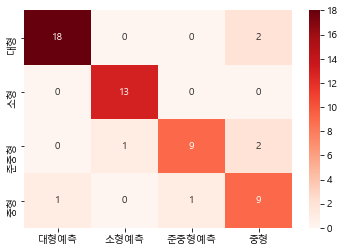

In [12]:
cm_knn = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm_knn, annot=True, cmap='Reds',
           xticklabels=['대형예측','소형예측','준중형예측','중형'],
           yticklabels=gridS_knn.classes_, fmt='d')
plt.show()

---
## decision tree
### 예측값 찾기

In [13]:
model_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())
param_value = {'decisiontreeclassifier__criterion':["gini", "entropy"]}
gridS_dt = GridSearchCV(model_dt, param_grid=param_value)
gridS_dt.fit(x_train, y_train)
# model_tree.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy']})

In [14]:
print('decision_tree 예측값', gridS_dt.predict(data))

decision_tree 예측값 ['소형']


### DT f1_score(train, test), confusion matrix

In [15]:
y_pred_train = gridS_dt.best_estimator_.predict(x_train)
f1_train_dt = f1_score(y_train, y_pred_train,average='macro')
print('train f1_score:', f1_train_dt)

y_pred_test = gridS_dt.predict(x_test)
f1_test_dt = f1_score(y_test, y_pred_test,average='macro')
print('test f1_score:', f1_test_dt)

train f1_score: 1.0
test f1_score: 0.9415584415584416


In [16]:
gridS_dt.classes_

array(['대형', '소형', '준중형', '중형'], dtype=object)

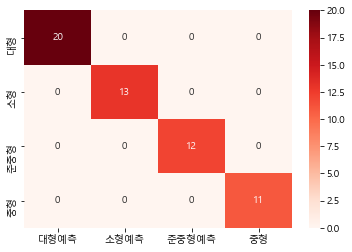

In [17]:
cm_dt = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm_dt, annot=True, cmap='Reds',
           xticklabels=['대형예측','소형예측','준중형예측','중형'],
           yticklabels=gridS_dt.classes_, fmt='d')
plt.show()

---
## naive_bayes
### 예측값 찾기

In [18]:
model_nb = make_pipeline(StandardScaler(), GaussianNB())
model_nb.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [19]:
print('예측값: ',model_nb.predict(data))

예측값:  ['소형']


### NB f1_score(train, test), confusion matrix

In [20]:
y_pred_train = model_nb.predict(x_train)
f1_train_nb = f1_score(y_train, y_pred_train, average='macro')
print('train_f1: ', f1_train_nb)

y_pred_test = model_nb.predict(x_test)
f1_test_nb = f1_score(y_test, y_pred_test, average='macro')
print('test_f1: ', f1_test_nb)

train_f1:  0.5251124446869128
test_f1:  0.4083333333333333


In [21]:
model_nb.classes_

array(['대형', '소형', '준중형', '중형'], dtype='<U3')

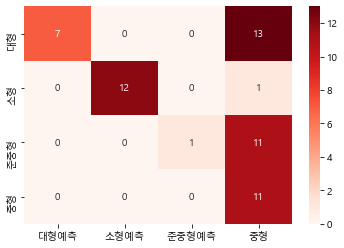

In [22]:
cm_nb = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm_nb, annot=True, cmap='Reds',
           xticklabels=['대형예측','소형예측','준중형예측','중형'],
           yticklabels=model_nb.classes_, fmt='d')
plt.show()

---
## SVM
### 예측값 찾기

In [23]:
x_data = pd.get_dummies(x_data, columns=['연료','변속기'])

In [24]:
model_svm = make_pipeline(StandardScaler(), SVC())
model_svm.fit(x_data, y_data)

param_val = {'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'svc__C':list(range(1, 11)), 'svc__gamma':['scale', 'auto']}
gridS_svc= GridSearchCV(model_svm, param_grid=param_val, scoring='f1_macro')
gridS_svc.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1_macro')

In [25]:
print('예측값: ',gridS_svc.best_estimator_.predict(data))

예측값:  ['소형']


### SVC f1_score(train, test), confusion matrix

In [26]:
y_pred_train = gridS_svc.predict(x_train)
f1_train_svc = f1_score(y_train, y_pred_train, average='macro')
print('train_f1: ', f1_train_svc)

y_pred_test = gridS_svc.predict(x_test)
f1_test_svc = f1_score(y_test, y_pred_test, average='macro')
print('test_f1: ', f1_test_svc)

train_f1:  0.9481605351170569
test_f1:  0.9415584415584416


In [27]:
gridS_svc.classes_

array(['대형', '소형', '준중형', '중형'], dtype=object)

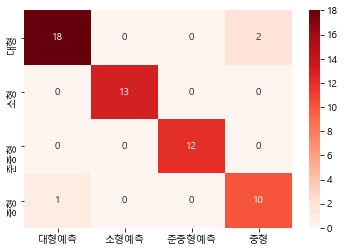

In [28]:
cm_svc = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm_svc, annot=True, cmap='Reds',
           xticklabels=['대형예측','소형예측','준중형예측','중형'],
           yticklabels=gridS_svc.classes_, fmt='d')
plt.show()

---
## 각 모델 별 train, test f1의 bar그래프, 가장 높은 f1_score 모델 확인.

In [29]:
f1_train_set = pd.DataFrame([[f1_train_knn, f1_train_dt, f1_train_nb, f1_train_svc]], columns=['knn','dt','nb','svc'])
display('f1_train_set',f1_train_set)

f1_test_set = pd.DataFrame([[f1_test_knn, f1_test_dt, f1_test_nb, f1_test_svc]], columns=['knn','dt','nb','svc'])
display('f1_test_set', f1_test_set)

'f1_train_set'

,knn,dt,nb,svc
0,0.863555,1.0,0.525112,0.948161


'f1_test_set'

,knn,dt,nb,svc
0,0.855844,0.941558,0.408333,0.941558


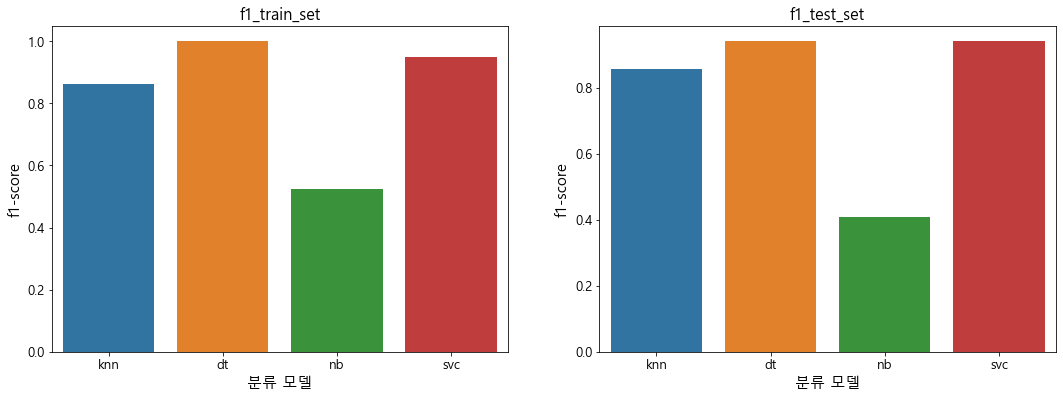

In [37]:
fig = plt.figure(figsize=(18,6))
fig.add_subplot(1,2,1)
sns.barplot(data = f1_train_set)
plt.title('f1_train_set', fontsize=16)
plt.xlabel('분류 모델', fontsize=15)
plt.ylabel('f1-score', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

fig.add_subplot(1,2,2)
sns.barplot(data = f1_test_set)
plt.title('f1_test_set', fontsize=16)
plt.xlabel('분류 모델', fontsize=15)
plt.ylabel('f1-score', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()